# <font color='red'>Titanic</font> - Machine Learning from Disaster
## Predict survival on the <font color='red'>Titanic</font> and get familiar with ML basics

Kaggle challenge for beginners: https://www.kaggle.com/c/titanic

**Goal:** In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Result File Format:**

It should have exactly 418 entries plus a header row. The only columns allowed are PassengerId and Survived (0/1).

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains the binary predictions: 1 for survived, 0 for deceased)


In [2]:
import pandas as pd
import numpy as np

In [3]:
# load train dataset
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Stage 1: Exploratory Data Analysis

#### Find patterns in the dataset, data visualization, correlation map

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [6]:
# Check if there are NA values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Points of note:

1. Define numerical, categorical and target variables
2. Not going to include PassengerId and Name since those are not relevant
3. Also not going to include Survived because it's the target variable
4. Variable Pclass messes up description, not going to add it to categorical variables right now

In [9]:
nums = ['Age', 'SibSp', 'Parch', 'Fare']
cats = ['Sex', 'Ticket', 'Cabin', 'Embarked']
target = ['Survived']

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df[nums].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Points of note:

1. "Age" variable seems to follow something like a normal distribution (mean and median are not very different)
2. "Fare" is very inclined to the right (mean is much larger than median)

<AxesSubplot:>

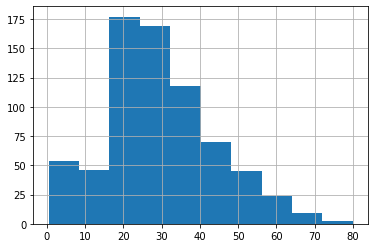

In [12]:
df['Age'].hist()

<AxesSubplot:>

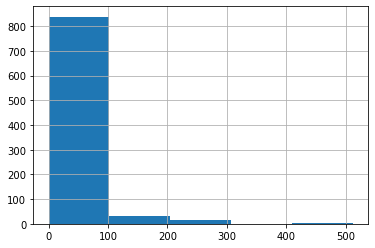

In [13]:
df['Fare'].hist(bins = 5)

In [14]:
df.query('Fare > 300')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [15]:
df[cats].describe()

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,4,644


More notes:

1. Ticket number is duplicated on several records (suspicious?)
2. Cabin number is also duplicated and missing most of the time. It can be removed from the dataset so as not to mess up the model.
3. Most of the passengers on the dataset are male.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

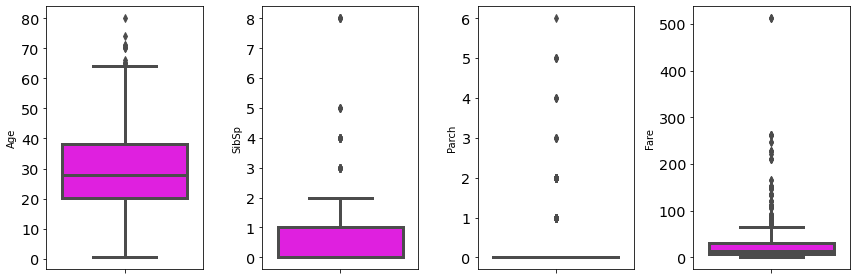

In [18]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

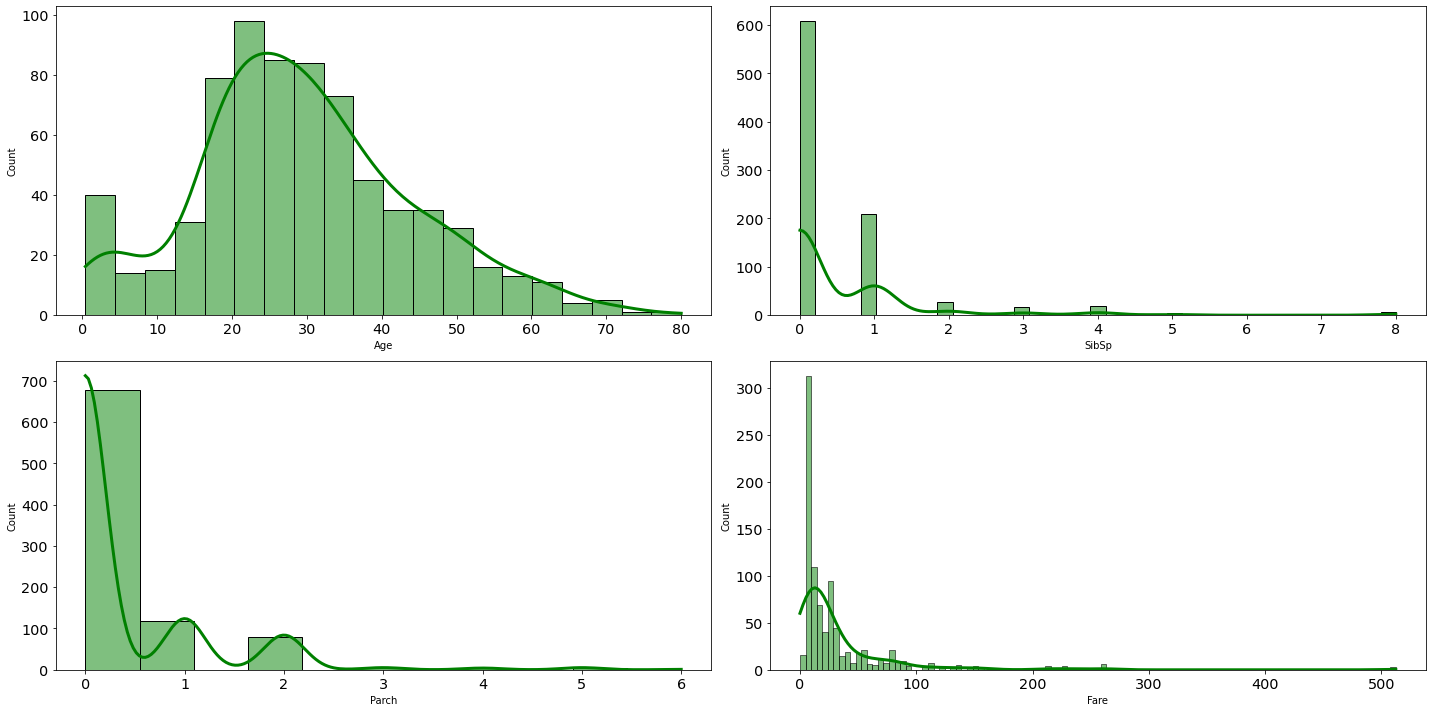

In [19]:
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(2, int(len(nums)/2), i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

### Step 2: Feature Engineering
#### Handle duplicate or missing values, deal with outliers, feature selection and extraction

In [20]:
df.query('Fare > 300')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [21]:
# Remove outliers with Fare > 300
df = df[df.Fare <= 300]

<AxesSubplot:>

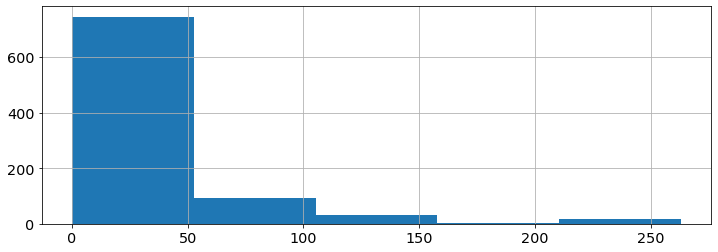

In [22]:
df.Fare.hist(bins = 5)

<AxesSubplot:ylabel='Fare'>

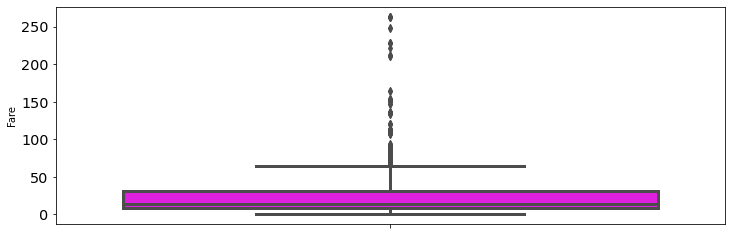

In [23]:
sns.boxplot(y = df.Fare, color = 'magenta', orient = 'v')

In [24]:
df.query('Fare > 150').count()

PassengerId    26
Survived       26
Pclass         26
Name           26
Sex            26
Age            24
SibSp          26
Parch          26
Ticket         26
Fare           26
Cabin          22
Embarked       26
dtype: int64

In [25]:
# Remove outliers with Fare > 150
df = df[df.Fare <= 150]

<AxesSubplot:>

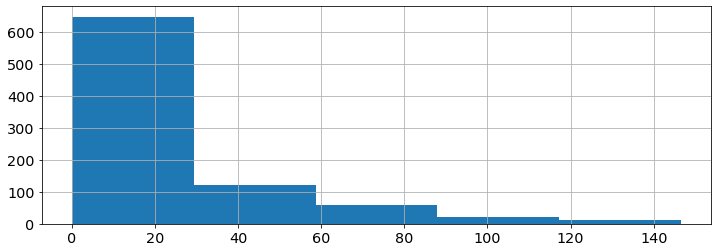

In [26]:
df.Fare.hist(bins = 5)

<AxesSubplot:ylabel='Fare'>

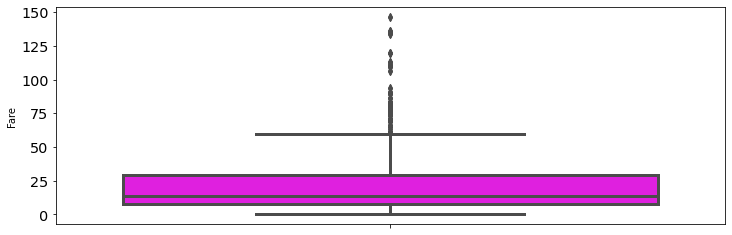

In [27]:
sns.boxplot(y = df.Fare, color = 'magenta', orient = 'v')

In [28]:
# The majority of cabin information is missing: drop the column, since very little useful information can be extracted as-is
df.drop('Cabin', axis='columns', inplace=True)

In [29]:
df.Embarked.fillna(df.Embarked.mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 862, dtype: object

In [30]:
# Column Embarked is almost entirely filled, fill missing values with the value that occurs most often
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [31]:
df.Age.median()

28.0

In [32]:
df.Age.fillna(df.Age.median(), inplace=True)

In [33]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
# Drop columns irrelevant to algorithm
df.drop(['PassengerId', 'Name', 'Ticket'], axis='columns', inplace=True)

In [35]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
667,0,3,male,28.0,0,0,7.7750,S
160,0,3,male,44.0,0,1,16.1000,S
586,0,2,male,47.0,0,0,15.0000,S
413,0,2,male,28.0,0,0,0.0000,S
246,0,3,female,25.0,0,0,7.7750,S
343,0,2,male,25.0,0,0,13.0000,S
179,0,3,male,36.0,0,0,0.0000,S
398,0,2,male,23.0,0,0,10.5000,S
598,0,3,male,28.0,0,0,7.2250,C
569,1,3,male,32.0,0,0,7.8542,S


In [36]:
# Convert SibSp and Parch to only one column: HasRelatives
df['HasRelatives'] = np.where(
    (df.SibSp > 1) | (df.Parch > 1), 1, 0
)
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasRelatives
51,0,3,male,21.0,0,0,7.8000,S,0
167,0,3,female,45.0,1,4,27.9000,S,1
484,1,1,male,25.0,1,0,91.0792,C,0
264,0,3,female,28.0,0,0,7.7500,Q,0
148,0,2,male,36.5,0,2,26.0000,S,1
729,0,3,female,25.0,1,0,7.9250,S,0
453,1,1,male,49.0,1,0,89.1042,C,0
844,0,3,male,17.0,0,0,8.6625,S,0
513,1,1,female,54.0,1,0,59.4000,C,0
150,0,2,male,51.0,0,0,12.5250,S,0


In [37]:
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [38]:
# Check if the new HasRelatives variable has any correlation to the target variable
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,HasRelatives
Survived,1.000000,-0.325826,-0.072543,0.304746,0.022518
Pclass,-0.325826,1.000000,-0.357787,-0.656498,0.108980
Age,-0.072543,-0.357787,1.000000,0.150627,-0.260536
Fare,0.304746,-0.656498,0.150627,1.000000,0.202985
HasRelatives,0.022518,0.108980,-0.260536,0.202985,1.000000


### Step 3: Data preprocessing
#### Converting categorical data to numeric labels (dummy/one-hot encoding, label encoding, etc), standardizing scales, normalizing

Use one-hot encoding on Embarked and Sex variables, because they are nominal variables (categorical).

There is no hierarchy that fits it.

In [39]:
dummy_embarked = pd.get_dummies(df.Embarked)
dummy_sex = pd.get_dummies(df.Sex)

In [40]:
dummy_embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [41]:
dummy_sex.sample(5)

,female,male
633,0,1
678,1,0
313,0,1
437,1,0
365,0,1


In [42]:
df = pd.concat([df, dummy_sex, dummy_embarked], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasRelatives,female,male,C,Q,S
0,0,3,male,22.0,7.2500,S,0,0,1,0,0,1
1,1,1,female,38.0,71.2833,C,0,1,0,1,0,0
2,1,3,female,26.0,7.9250,S,0,1,0,0,0,1
3,1,1,female,35.0,53.1000,S,0,1,0,0,0,1
4,0,3,male,35.0,8.0500,S,0,0,1,0,0,1


In [43]:
df.drop(['Sex','Embarked'], axis = 1, inplace = True)

#### Feature Scaling: Normalization/Standardization of the dataset

1. Age: use **normalization** technique, because it is somewhat similar to a normal distribution
2. Fare: use **standardization** technique, because there are outliers

In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Step 4: Creating the Machine Learning model

In [49]:
# Define target and predicted variables
X = df.drop(['Survived'], axis = 1)
y = df.Survived

In [50]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y)